Import Module 

In [242]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import datasets
from mlxtend.data import loadlocal_mnist
from sklearn.svm import SVC

In [243]:
test_images, test_labels =loadlocal_mnist (images_path='C:/Users/HP/t10k-images.idx3-ubyte', 
                                            labels_path = 'C:/Users/HP/t10k-labels.idx1-ubyte')

In [244]:
train_images, train_labels =loadlocal_mnist (images_path='C:/Users/HP/train-images.idx3-ubyte', 
                                            labels_path = 'C:/Users/HP/train-labels.idx1-ubyte')

Data Preprocessing (Ektraksti Fitur)

In [245]:
train_images [0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [246]:
train_images[28].shape

(784,)

In [247]:
train_images[0].reshape(28,28,)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

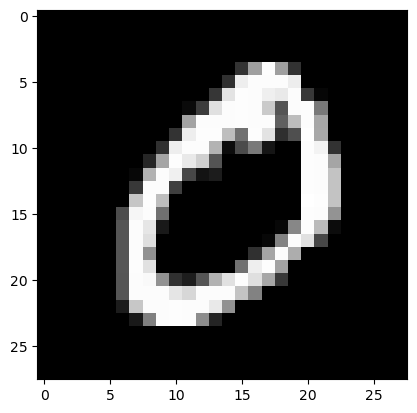

In [248]:
plt.imshow (train_images[1].reshape(28,28,), cmap ='gray')

Data labelling

In [249]:
train_labels[6]

1

# Test extract HOG feature from image

In [250]:
feature, hog_img = hog(train_images[1].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

In [251]:
feature.shape

(144,)

<BarContainer object of 144 artists>

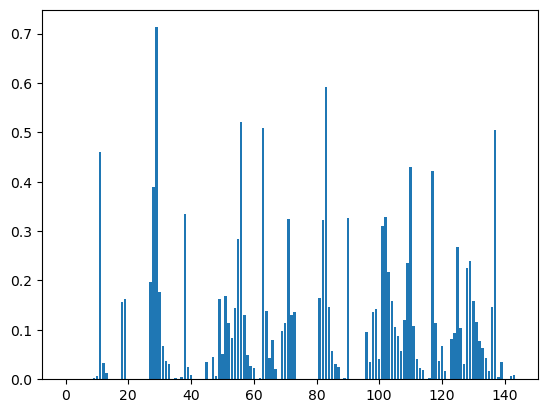

In [252]:
plt.bar(list(range(feature.shape[0])), feature)

In [253]:
feature, hog_img = hog(train_images[0].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

<BarContainer object of 144 artists>

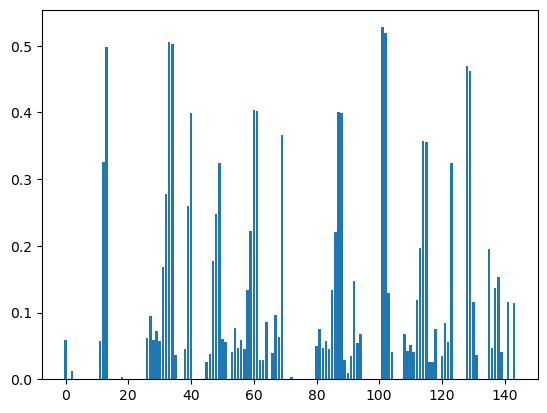

In [254]:
plt.bar(list(range(feature.shape[0])), feature)

2. Preprocessing Using HOG feature extraction

In [255]:
n_dims = feature.shape[0]

In [256]:
n_dims

144

In [257]:
n_samples = train_images.shape[0]

In [258]:
n_samples

60000

create variable for dataset

In [259]:
X_train, y_train = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [260]:
X_train.shape

(60000, 144)

Get HOG feature from each image & put into dataset variable

In [261]:
for i in range(n_samples):
    X_train[i], _ = hog(train_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_train[i] = train_labels[i]

convert categorical label to one hot label

In [262]:
from sklearn.preprocessing import LabelBinarizer

In [263]:
lb = LabelBinarizer()

In [264]:
lb.fit(y_train)

LabelBinarizer()

In [265]:
y_train_one_hot = lb.transform(y_train)

In [266]:
y_train_one_hot[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [267]:
y_train[0]

5

In [268]:
import numpy as np

In [269]:
label = lb.inverse_transform(np.array([y_train_one_hot[0]]))

In [270]:
label[0]

5

3. Classification With Support Vector Machine (SVM)

In [271]:
from sklearn.svm import SVC

In [272]:
clf = SVC()

In [273]:
clf.fit(X_train, y_train)

SVC()

4. Predict Test Datasets

In [274]:
n_samples = test_images.shape[0]

In [275]:
x_test, y_test = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [276]:
for i in range(n_samples):
    x_test[i], _ = hog(test_images[1].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_test[i] = test_labels[i]

In [277]:
y_test_one_hot = lb.transform(y_test)

In [278]:
y_pred_one_hot = clf.predict(x_test)

In [280]:
import numpy as np

In [281]:
y_pred_one_hot = np.reshape(y_pred_one_hot, (-1, 1))

In [283]:
y_pred = lb.inverse_transform(y_pred_one_hot)

In [284]:
print(y_pred_one_hot.shape)

(10000, 1)


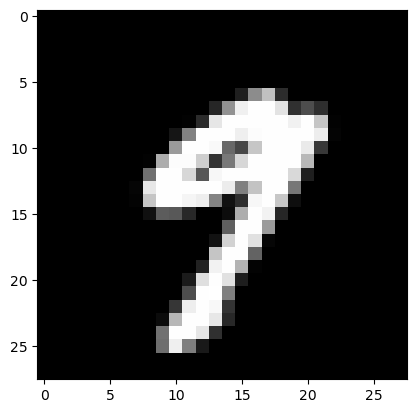

In [304]:
plt.imshow(test_images[20].reshape(28,28), cmap='gray')

In [305]:
out_one_hot = clf.predict(x_test[10].reshape(1, n_dims))

In [306]:
out_one_hot

array([2])

In [307]:
out_one_hot_expanded = np.expand_dims(out_one_hot, axis=1)

In [308]:
out = lb.inverse_transform(out_one_hot_expanded)

In [309]:
out[0]

0

#Evaluation Metrics

In [310]:
from sklearn.metrics import confusion_matrix

In [311]:
conf_mat = confusion_matrix(y_test, y_pred)

In [312]:
conf_mat

array([[ 980,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1135,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1032,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1010,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 982,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 892,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 958,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1028,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 974,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [1009,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int64)

In [313]:
from mlxtend.plotting import plot_confusion_matrix

In [314]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

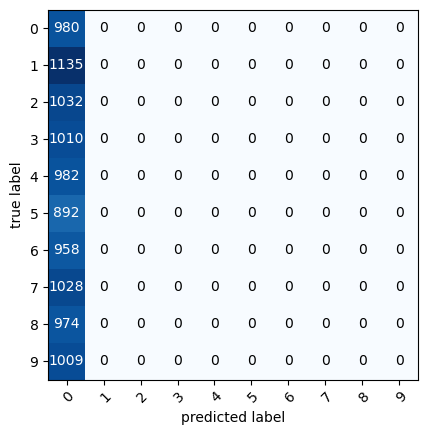

In [315]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, class_names=class_names)

#precission

In [298]:
from sklearn.metrics import precision_score

In [299]:
precision = precision_score(y_test, y_pred, average=None)

C:\Users\HP\Autodesk\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [300]:
precision

array([0.098, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])

#Accuracy

In [301]:
from sklearn.metrics import accuracy_score

In [302]:
accuracy = accuracy_score(y_test, y_pred)

In [303]:
accuracy

0.098